<a href="https://colab.research.google.com/github/TranQuocDuy123/TranQuocDuy123/blob/main/Du_doan_goc_peta1_peta2_peta3_cua_robot_4_bac_tu_do.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as ma
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [ ]:
create_data=[]
for i in range(0,180,2):
    array=[]
    for j in range(0,180,2):
        k=180-i-j
        x=50*ma.cos(ma.radians(i))+40*ma.cos(ma.radians(i+j))+30*ma.cos(ma.radians(i+j+k))
        y=50*ma.sin(ma.radians(i))+40*ma.sin(ma.radians(i+j))+30*ma.sin(ma.radians(i+j+k))
        array.append(np.array((i,j,k,x,y)))
    create_data.extend(array)

In [ ]:
header = ['goc1', 'goc2', 'goc3' ,'x', 'y']
with open('robot_3d.csv', 'w', encoding='UTF8', newline='') as bang_du_lieu:
    a = csv.writer(bang_du_lieu)
    a.writerow(header)
    a.writerows(create_data)

In [ ]:
data=pd.read_csv('robot_3d.csv')
data

,goc1,goc2,goc3,x,y
0,0.0,0.0,180.0,60.000000,3.673940e-15
1,0.0,2.0,178.0,59.975633,1.395980e+00
2,0.0,4.0,176.0,59.902562,2.790259e+00
3,0.0,6.0,174.0,59.780876,4.181139e+00
4,0.0,8.0,172.0,59.610723,5.566924e+00
...,...,...,...,...,...
8095,178.0,170.0,-168.0,-40.843637,-6.571493e+00
8096,178.0,172.0,-170.0,-40.577231,-5.200952e+00
8097,178.0,174.0,-172.0,-40.358819,-3.821949e+00
8098,178.0,176.0,-174.0,-40.188666,-2.436164e+00


In [ ]:
x_data=np.array(data.drop(['goc1','goc2','goc3'],axis=1))
y_data=np.array(data[['goc1','goc2','goc3']])
y_data.shape

(8100, 3)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1)
x_train.shape

(7290, 2)

In [ ]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(3,  activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 9)                 153       
                                                                 
 dense_11 (Dense)            (None, 3)                 30        
                                                                 
Total params: 11,431
Trainable params: 11,431
Non-trai

In [ ]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,batch_size=200,epochs=5000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)]) 

Epoch 1/5000
30/30 [==============================] - 1s 8ms/step - loss: 6955.0591 - mean_absolute_error: 68.1984 - val_loss: 3809.7498 - val_mean_absolute_error: 48.2299
Epoch 2/5000
30/30 [==============================] - 0s 4ms/step - loss: 3371.8074 - mean_absolute_error: 45.3343 - val_loss: 2537.6733 - val_mean_absolute_error: 36.1032
Epoch 3/5000
30/30 [==============================] - 0s 4ms/step - loss: 2542.1943 - mean_absolute_error: 35.7796 - val_loss: 2311.7715 - val_mean_absolute_error: 33.1889
Epoch 4/5000
30/30 [==============================] - 0s 4ms/step - loss: 2430.7500 - mean_absolute_error: 33.9365 - val_loss: 2269.2358 - val_mean_absolute_error: 32.4689
Epoch 5/5000
30/30 [==============================] - 0s 4ms/step - loss: 2408.6455 - mean_absolute_error: 33.6413 - val_loss: 2251.6816 - val_mean_absolute_error: 32.2008
Epoch 6/5000
30/30 [==============================] - 0s 4ms/step - loss: 2400.3342 - mean_absolute_error: 33.4942 - val_loss: 2246.6016 - v

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test mae:',score[1])

Test loss: 5.568868637084961
Test mae: 1.6147881746292114


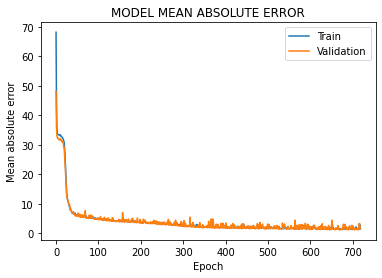

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred[200]

array([33.742065, 99.13744 , 47.526432], dtype=float32)

In [ ]:
y_test[200]

array([ 34., 100.,  46.])